## **Question 1**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
arr = np.zeros((10, 10), dtype = np.float64)
arr[0] = arr[8] = arr[9] = 0
for i in range(1, 7):
  arr[0][i] = 1
  arr[1][i] = 1
for i in range(2, 7):
  arr[2][i] = 1
  arr[3][i] = 1
  arr[4][i] = 1
for i in range (5, 8):
  arr[6][i] = 1
for i in range(2, 8):
  arr[7][i] = 1
  arr[8][i] = 1
  arr[9][i] = 1
print(arr)

[[0. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 0. 0.]]


Text(0.5, 1.0, 'Original Image\n')

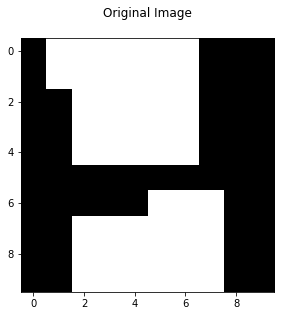

In [3]:
fig = plt.figure(figsize=(10, 10))
rows = 1
columns = 2
fig.add_subplot(rows, columns, 1)
plt.imshow(arr, cmap = 'gray')
# plt.axis('off')
plt.title("Original Image\n")

## **Connected Component Labelling in binary images (Assume 4-connectivity)**:
```
r: top neighbor of pixel p
t: left neighbor of pixel p
m: no. of rows
n: no. of columns
Algorithm connected_component_labelling():
{
for j in range(n):
  if arr[0][j]==1:
    if arr[0][j - 1] == 1:
      label_mat[0][j] = label_mat[0][j - 1]
    else:
      label = label + 1
      label_mat[0][j] = label

for i in range(1, m):
  if arr[i][0] == 1:
    if arr[i - 1][0] == 1:
      label_mat[i][0] = label_mat[i - 1][0]
    else:
      label = label + 1
      label_mat[i][0] = label
for i := 1 to m do
    for j :=1 to n do
    if intensity(p) = 1 and (intensity(r) = intensity(t) = 0) then:
         Assign a new label to pixel p
    if intensity(p) = 1 and only one of its two neighbors are 1 then:
        Assign the label of the neighbor with an intensity of 1 to pixel p
    if intensity(p) = 1 and (intensity(r) = intensity(t) = 1) then:
             if (label(r) = label(t)) then:
                  set label of pixel p to the label(t)
             else:
                assign any one of the two labels to pixel p and mark both the  labels equivalent
}
```

In [4]:
# Algorithm
label = 0  # Variable to assign labels
equi_pairs=[] # List of equivalent label pairs
label_mat = np.zeros(arr.shape, dtype = int) # 2D matrix to store labels corresponding to the (i,j)th pixel in arr
for j in range(arr.shape[1]):
  if arr[0][j]==1:
    if arr[0][j - 1] == 1:
      label_mat[0][j] = label_mat[0][j - 1]
    else:
      label = label + 1
      label_mat[0][j] = label

for i in range(1, arr.shape[0]):
  if arr[i][0] == 1:
    if arr[i - 1][0] == 1:
      label_mat[i][0] = label_mat[i - 1][0]
    else:
      label = label + 1
      label_mat[i][0] = label

for i in range(1, arr.shape[0]):
  for j in range(1, arr.shape[1]):
    if arr[i][j] == 1 and arr[i-1][j] == 0 and arr[i][j-1] == 0: #If top and left pixel of (i,j) is 0
      label = label + 1
      label_mat[i][j] = label     # Assign a new label to (i,j)

    if (arr[i][j] == 1 and arr[i-1][j] == 1 and arr[i][j-1] == 0) or \
        (arr[i][j] == 1 and arr[i-1][j] == 0 and arr[i][j-1] == 1): #If either of the top and right pixel of (i,j) is 1
      if arr[i-1][j] == 1:
        label_mat[i][j] = label_mat[i-1][j]
      else:
        label_mat[i][j] = label_mat[i][j-1]

    if arr[i][j] == 1 and arr[i-1][j] == 1 and arr[i][j-1] == 1: #If both top and right pixel of (i,j) is 1
      if label_mat[i-1][j] == label_mat[i][j-1]: # If both top and right pixels have the same label
        label_mat[i][j] = label_mat[i][j-1]
      else:
        label_mat[i][j] = label_mat[i][j-1]
        x = label_mat[i-1][j]
        y = label_mat[i][j-1]
        equi_pairs.append((x,y))

print(equi_pairs)
print(label_mat)

[(2, 3), (2, 3), (2, 3)]
[[0 1 1 1 1 1 1 0 0 0]
 [0 1 1 1 1 1 1 0 0 0]
 [0 0 1 1 1 1 1 0 0 0]
 [0 0 1 1 1 1 1 0 0 0]
 [0 0 1 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 2 2 0 0]
 [0 0 3 3 3 3 3 3 0 0]
 [0 0 3 3 3 3 3 3 0 0]
 [0 0 3 3 3 3 3 3 0 0]]


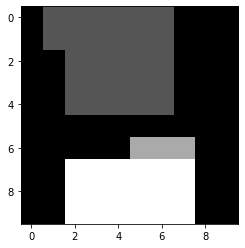

In [5]:
plt.imshow(label_mat,cmap="gray")
plt.show()

In [6]:
equiv_classes=[] # To store equivalent labels
if len(equi_pairs) != 0:
  item = equi_pairs[0]
  class1 = list(item)
  equiv_classes.append(class1)
  print(equiv_classes)
  for i in range(1,len(equi_pairs)):
    item = equi_pairs[i]
    flag = 0
    for j in range(len(equiv_classes)):
      k = equiv_classes[j]
      if(item[0] not in k) and (item[1] in k):
        equiv_classes[j].append(item[0])
        flag = 1
        break
      if(item[0] in k) and (item[1] not in k):
        equiv_classes[j].append(item[1])
        flag = 1
        break
    if flag==0:
      equiv_classes.append(list(item))
print(equiv_classes)
# Creating final labelled component matrix
for i in  range(label_mat.shape[0]):
  for j in range(label_mat.shape[1]):
    for k in equiv_classes:
      if label_mat[i][j] in k:
        label_mat[i][j] = k[0]

print(label_mat)

[[2, 3]]
[[2, 3], [2, 3], [2, 3]]
[[0 1 1 1 1 1 1 0 0 0]
 [0 1 1 1 1 1 1 0 0 0]
 [0 0 1 1 1 1 1 0 0 0]
 [0 0 1 1 1 1 1 0 0 0]
 [0 0 1 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 2 2 0 0]
 [0 0 2 2 2 2 2 2 0 0]
 [0 0 2 2 2 2 2 2 0 0]
 [0 0 2 2 2 2 2 2 0 0]]


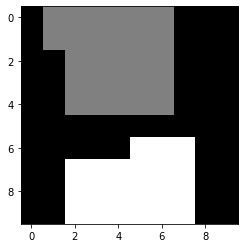

In [7]:
plt.imshow(label_mat,cmap="gray")
plt.show()

# **Find perimeter of each connected component**
Here I consider every small box has perimeter 4 i.e, two connected box has total perimeter 6 (2+1+2+1 = 6)
```
Initialize a list parimeter with length is max level of label_mat matrix and every element as 0

for j in range(label_mat.shape[1]):
  if label_mat[0][j] != 0:
    if label_mat[0][j - 1] == label_mat[0][j]:
      perimeter[label_mat[0][j] - 1] += 2
    else:
      perimeter[label_mat[0][j] - 1] += 4

for i in range(1, label_mat.shape[0]):
  if label_mat[i][0] != 0:
    if label_mat[i - 1][0] == label_mat[i][0]:
      perimeter[label_mat[i][0] - 1] += 2
    else:
      perimeter[label_mat[i][0] - 1] += 4

for i in range(1, label_mat.shape[0]):
  for j in range(1, label_mat.shape[1]):
    p = label_mat[i][j]
    if p != 0 and label_mat[i-1][j] != p and label_mat[i][j-1] != p: #If top and left pixel of (i,j) is 0
      perimeter[p - 1] += 4

    if (p != 0 and label_mat[i-1][j] == p and label_mat[i][j-1] != p) or \
        (p != 0 and label_mat[i-1][j] != p and label_mat[i][j-1] == p): #If either of the top and right pixel of (i,j) is 1
      perimeter[p - 1] += 2

    if p != 0 and label_mat[i-1][j] == p and label_mat[i][j-1] == p: #If both top and right pixel of (i,j) is 1
      perimeter[p - 1] += 0
```

In [8]:
m = np.max(label_mat)
perimeter = [0]*m
label = 1  # Variable to assign labels
for j in range(label_mat.shape[1]):
  if label_mat[0][j] != 0:
    if label_mat[0][j - 1] == label_mat[0][j]:
      perimeter[label_mat[0][j] - 1] += 2
    else:
      perimeter[label_mat[0][j] - 1] += 4

for i in range(1, label_mat.shape[0]):
  if label_mat[i][0] != 0:
    if label_mat[i - 1][0] == label_mat[i][0]:
      perimeter[label_mat[i][0] - 1] += 2
    else:
      perimeter[label_mat[i][0] - 1] += 4

for i in range(1, label_mat.shape[0]):
  for j in range(1, label_mat.shape[1]):
    p = label_mat[i][j]
    if p != 0 and label_mat[i-1][j] != p and label_mat[i][j-1] != p: #If top and left pixel of (i,j) is 0
      perimeter[p - 1] += 4

    if (p != 0 and label_mat[i-1][j] == p and label_mat[i][j-1] != p) or \
        (p != 0 and label_mat[i-1][j] != p and label_mat[i][j-1] == p): #If either of the top and right pixel of (i,j) is 1
      perimeter[p - 1] += 2

    if p != 0 and label_mat[i-1][j] == p and label_mat[i][j-1] == p: #If both top and right pixel of (i,j) is 1
      perimeter[p - 1] += 0


In [9]:
print("Perimeter of connected components are")
for i in perimeter:
  print(i, end=', ')

Perimeter of connected components are
22, 20, 

## **Question 2**

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
img = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob('/content/drive/MyDrive/Colab Notebooks/Eye/**/*.ppm',recursive=True)]

In [13]:
fig = plt.figure(figsize=(70,40))
rows = 3
columns = 5
for i in range(len(img)):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img[i], cmap='gray')
    plt.axis('off')

Output hidden; open in https://colab.research.google.com to view.

Sharpening the blood vessels using  $9×9$  Laplacian Kernel

In [14]:
laplacian = []
for i in range(len(img)):
    laplacian.append(cv2.Laplacian(img[i],cv2.CV_16S, ksize=9))

In [ ]:
fig2 = plt.figure(figsize=(70,40))
rows = 3
columns = 5
for i in range(len(laplacian)):
    fig2.add_subplot(rows, columns, i+1)
    plt.imshow(laplacian[i], cmap='gray')
    plt.axis('off')

Normalization of the sharpen images

In [ ]:
ln = []
for i in range(len(laplacian)):
    ln.append(cv2.normalize(laplacian[i],None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F))

Binary masking for the blood vessels using threshold 0.75 on normalize image

In [ ]:
Thr = []
for i in range(len(ln)):
    arr_thres = np.zeros(ln[i].shape)
    arr_thres = ((ln[i] > .75).astype(np.uint8))*255
    Thr.append(arr_thres)

In [ ]:
fig3 = plt.figure(figsize=(70,40))
rows = 3
columns = 5
for i in range(len(Thr)):
    fig3.add_subplot(rows, columns, i+1)
    plt.imshow(Thr[i], cmap='gray')
    plt.axis('off')